In [1]:
# HIDDEN
from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
from scipy import stats

In [2]:
# HIDDEN
n = 10000
a = -2
b = 2
z = stats.norm.rvs(size=n)
y = z**2 + stats.uniform.rvs(a, b-a, size=n)
xmin = min(z)
xmax = max(z)

In [3]:
# HIDDEN
def plot_curved_scatter():
    plt.scatter(z, y)
    plt.xlabel('$X$')
    plt.ylabel('$Y$', rotation=0)
    plt.xlim(-2, 2)
    plt.ylim(-3, 6);

## Variance by Conditioning ##

In [4]:
# VIDEO: Variance by Conditioning: An Observation
from IPython.display import YouTubeVideo

YouTubeVideo('H1aOoaIWLQQ')

Iteration allows us to find expectation by conditioning. We now have the tools to find variance by conditioning as well.

Recall the notation of the previous section:
- $X$ and $Y$ are jointly distributed random variables
- $b(X) = E(Y \mid X)$
- $D_w = Y - b(X)$

Define $D_Y = Y - E(Y)$. Then

$$
D_Y ~ = ~  D_w + (b(X) - E(Y)) ~ = ~ D_w + D_b
$$

where $D_b = b(X) - E(Y)$ is the deviation of the random variable $b(X)$ from its expectation $E(Y)$.

In the graph below, the black line is at the level $E(Y)$, and the dark blue point is a generic point $(X, Y)$ in the scatter plot. Its distance from the black line is $D_Y$ and is equal to the sum of two lengths:
- $D_w$, the length of the purple segment
- $D_b$, the length of the green segment

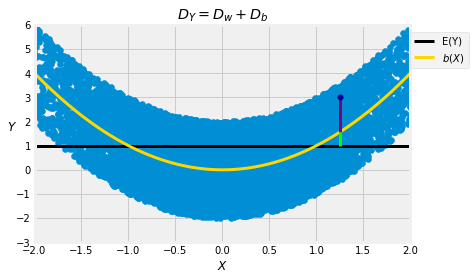

In [5]:
# NO CODE
plot_curved_scatter()
x = np.arange(xmin, xmax+0.01, 0.01)
plt.plot([xmin, xmax], [1, 1], color='k', lw=3, label='E(Y)')
plt.plot(x, x**2, color='gold', lw=3, label='$b(X)$')
xstar = 1.25
ystar = 3
plt.plot([xstar, xstar], [ystar, xstar**2], color='purple', lw=3)
plt.plot([xstar, xstar], [xstar**2, 1], color='lime', lw=3)
plt.scatter(xstar, ystar, color='darkblue', s=30, zorder=3)
plt.legend(loc=(1, 0.8))
plt.title('$D_Y = D_w + D_b$')
plt.xlim(-2, 2)
plt.ylim(-3, 6);

In [6]:
# VIDEO: Variance by Conditioning: Formula
YouTubeVideo('EWxRQv5k-uE')

### Decomposition of Variance ###

The expectation $E(Y)$ is a constant. That means $D_b = b(X) - E(Y)$ is a function of $X$, and hence $E(D_wD_b) = 0$. So

$$
\begin{align*}
Var(Y) ~ = ~ E(D_Y^2) ~ &= ~ E\big{(} (D_w + D_b)^2 \big{)} \\
&= E(D_w^2) + E(D_b^2) + 2 E(D_wD_b) \\
&= E(D_w^2) + E(D_b^2)
\end{align*}
$$

Let's take a closer look at the two terms on the right hand side. In the previous section we saw that

$$
E(D_w^2) ~ = ~ MSE(b) ~ = ~ E(Var(Y \mid X))
$$

Thus the first term on the right hand side is the *expectation of the conditional variance*.

To understand the second term, note that $D_b = b(X) - E(Y) = b(X) - E(b(X))$. So

$$
E(D_b^2) ~ = ~ Var(b(X)) ~ = ~ Var(E(Y \mid X))
$$

Thus the second term on the right is the *variance of the conditional expectation*.

We thus have a *decomposition of variance*:

$$
Var(Y) ~ = ~ E(Var(Y \mid X)) + Var(E(Y \mid X))
$$

That is, **the variance is equal to the expectation of the conditional variance plus the variance of the conditional expectation**.

It makes sense that the two quantities on the right hand side are involved in the calculation of $Var(Y)$. The variability of $Y$ has two components:

- the rough size of the variability within the individual vertical strips, that is, the expectation of the conditional variance
- the variability between strips, measured by the variance of the centers of the strips.

The variance decomposition show that you can just add the two terms to get $Var(Y)$.

This decomposition is the basis of *analysis of variance* (ANOVA), widely used in statistics. In this course we are going to use it to find variances by conditioning.